In [50]:
from sklearn.cluster import KMeans

def Kmeans(X,k=2):
    # Clusters data into k clusters, where k can be a vector of different integers, 
    # in which case clustering is made for each k.
    if isinstance(k, int):
        kmeans = KMeans(n_clusters=k).fit(X)
        return kmeans.labels_, kmeans.inertia_
    
    labels = np.zeros([X.shape[0],len(k)])
    inertia = np.zeros(len(k))
    for i in range(len(k)):
        kmeans = KMeans(n_clusters=k[i]).fit(X)
        labels[:,i] = kmeans.labels_
        inertia[i] = kmeans.inertia_
    
    return labels, inertia

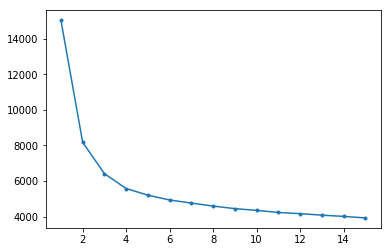

In [100]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
import CreateDataFunctions as cdf

nrDataPoints = 1000
nrFeatures = 10
seed  = 10

X = cdf.normal_data_with_cov(nrDataPoints, nrFeatures, seed)
nrFeaturesKeep = 5

pca = PCA(nrFeaturesKeep)
pca = pca.fit(X)

isomap = Isomap(n_components=nrFeaturesKeep)
isomap = isomap.fit(X)

Y_PCA = pca.transform(X)
Y_ISO = isomap.transform(X)

k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

cluster_PCA, inertia_PCA = Kmeans(Y_PCA,k)
cluster_ISO, inertia_ISO = Kmeans(Y_ISO,k)
cluster_orig, inertia_orig = Kmeans(X,k)
PlotElbow(inertia_orig,k)

In [8]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random
import math
from sklearn.utils import shuffle

def CreateData(nrDataPoints = 1000, nrFeatures = 30):
    mean = np.zeros(nrFeatures)
    var = np.random.rand(nrFeatures)
    sigma = np.diag(var)
    data = np.random.multivariate_normal(mean,sigma,nrDataPoints)
    return data

def CreateSphere(nrDataPoints = 1000, nrFeatures = 30):
    

In [35]:
from sklearn.metrics import silhouette_score

def EvaluateClusteringSilhouette(X,labels):
    if len(labels.shape)==1:
        score = silhouette_score(X,labels)
        return score
    score = np.zeros(labels.shape[1])
    for i in range(labels.shape[1]):
        score[i] = silhouette_score(X,labels[:,i])
    return score

In [67]:
import matplotlib.pyplot as plt
import matplotlib

def PlotElbow(inertia,k):
    plt.plot(k,inertia,'.-')

In [60]:
range(len(inertia_ISO))

range(0, 15)

In [91]:

def GenerateSpherical(nrDataPoints=1000,nrFeatures=30):
    mean = np.zeros(nrFeatures)
    var = np.zeros(nrFeatures)+1
    sigma = np.diag(var)
    gaussian = np.random.multivariate_normal(mean,sigma,nrDataPoints)
    sphere = np.zeros([nrDataPoints,nrFeatures])
    for i in range(nrDataPoints):
        sphere[i,:] = gaussian[i,:]/np.linalg.norm(gaussian[i,:])
    return sphere
    

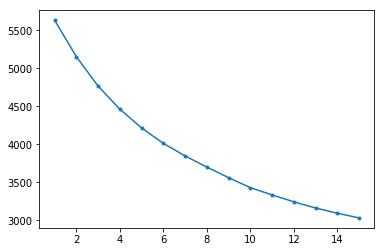

In [97]:
nrDataPoints = 1000
nrFeatures = 20

X =GenerateSpherical(nrDataPoints, nrFeatures)
k = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

nrFeaturesKeep = 10

isomap = Isomap(n_components=nrFeaturesKeep)
isomap = isomap.fit(X)
Y = isomap.transform(X)

cluster_sphere, inertia_sphere = Kmeans(Y,k)
PlotElbow(inertia_sphere,k)
